In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 1) Load the data
Path_life_expectancy = r'C:\Users\jonaw\OneDrive\Dokumente\Coding\Computational Economics\Econometrics\life_expectancy.csv'

pd.read_csv(Path_life_expectancy)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# List all columns in the dataset
df = pd.read_csv(Path_life_expectancy)
print(df.columns)

# Rename columns for easier access
df = df.rename(columns={'Life expectancy ': 'Life_expectancy'})

# Drop NA values for Life Expectancy and Schooling
df = df.dropna(subset=['Life_expectancy', 'Schooling'])

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


Text(0, 0.5, 'Life Expectancy (years)')

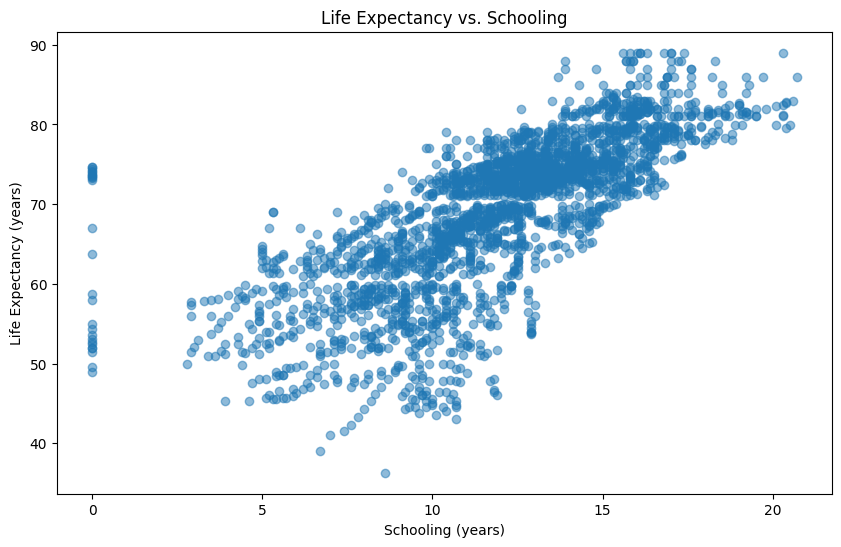

In [12]:
# 2) Create a scatter plot of Life Expectancy vs. Schooling
plt.figure(figsize=(10, 6))
plt.scatter(df['Schooling'], df['Life_expectancy'], alpha=0.5)

plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')


In [13]:
# 3) Estimate the simple linear regression model
import statsmodels.formula.api as smf

model = smf.ols(formula='Life_expectancy ~ Schooling', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     3599.
Date:                 Mo, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:49:27   Log-Likelihood:                -8964.3
No. Observations:                2768   AIC:                         1.793e+04
Df Residuals:                    2766   BIC:                         1.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.1089      0.437    100.992      0.0

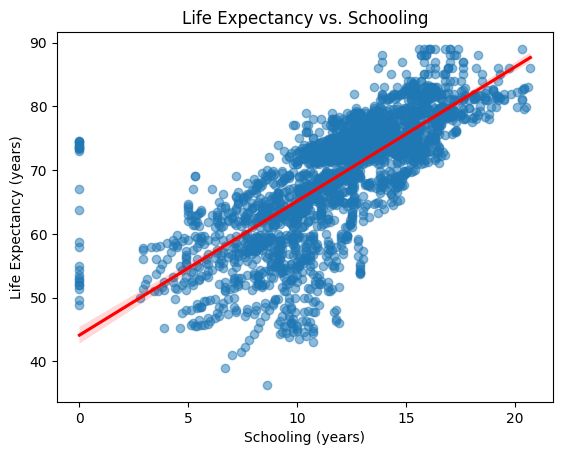

<Figure size 1000x600 with 0 Axes>

In [ ]:
import seaborn as sns
sns.regplot(
    x='Schooling', 
    y='Life_expectancy', 
    data=df, 
    ci=95,
    scatter_kws={'alpha': 0.5},    # Setzt die Transparenz der Punkte
    line_kws={'color': 'red'}      # Setzt die Farbe der Regressionslinie auf rot
)
plt.title('Life Expectancy vs. Schooling')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy (years)')w
plt.show()
